In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ESTCampAI/Deeplearning/LangChain

/content/drive/MyDrive/ESTCampAI/Deeplearning/LangChain


- 의존성 라이브러리 설치

In [3]:
!pip install -qU openai langchain langchain-openai langchain-community langchain-experimental

!pip install -qU langchain-text-splitters langchain-classic

!pip install -qU pypdf langchain-chroma faiss-cpu langchain-qdrant

!pip install -q python-docx openpyxl python-pptx unstructured

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.6/209.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.4 MB/s eta 0:00:00
  Installing build de

- API 키 등록

In [ ]:
api_key = ""

# 환경변수 등록
import os

# 추가 - 지정하고 대입
os.environ["OPENAI_API_KEY"] = api_key

# 간단한 챗봇 만들기

In [5]:
from langchain.chat_models import init_chat_model # 모델 초기화 함수
from langchain_core.output_parsers import StrOutputParser
from langchain_core.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

In [6]:
# 모델 초기화
llm = init_chat_model(model = "openai:gpt-4.1", temperature = 0, max_tokens = 500, streaming = True, callbacks = [StreamingStdOutCallbackHandler()])

In [7]:
# 체인 구성
chain = llm | StrOutputParser()

In [8]:
# 대화 루프 수행
while True:
  q = input("입력 >> ")

  if q == "exit" :
    print("채팅 종료")
    break

  # 모델 응답 출력
  temp = chain.invoke(q)

  print() # 모델 응답 후에 개행용

KeyboardInterrupt: Interrupted by user

# 메모리 추가하기
- 리스트를 이용하여 간단하게 메모리 구현하기
   - 대화내용을 리스트에 저장하고 MessagesPlaceholder로 리스트 내용을 프롬프트에 추가해서 질문

In [9]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
# MessagesPlaceholder : 이전 대화 내용을 그대로 가져와서, 프롬프트 안에 삽입할 수 있게 해주는 자리표시자

In [ ]:
# 0. 모델 초기화 - llm 변수 활용

In [ ]:
# 1. 대화 내용을 기록하기 위한 리스트 초기화
chat_history = []

In [ ]:
# 2. 메세지 템플릿 객체 생성 - 대화 내용 + 현재 질의를 한꺼번에 전달하는 템플릿 구성
messages = [
    ("system", "당신은 어릴적부터 같이 자라온 나의 가장 친한 친구로써, 반말을 사용함"),
    # 이전 대화 내용을 통째로 넣어주는 자리
    MessagesPlaceholder(variable_name = 'chat_history'),

    ("user", "{input}") # 사용자 입력값
]

prompt = ChatPromptTemplate.from_messages(messages)

In [ ]:
# 체인 구성
chain = prompt | llm | StrOutputParser()

In [ ]:
# 대화 루프 수행
while True:
  q = input("입력 >> ")

  if q == "exit" :
    print("채팅 종료")
    break

  # 모델 응답 출력 - 대화 기록과 현재 질의를 전달
  response = chain.invoke({"input" : q, "chat_history" : chat_history})

  print() # 모델 응답 후에 개행용

  # 대화 기록 저장
  chat_history.append(("human", q))
  chat_history.append(("ai", response))

#### 위처럼 간단한 list로 메모리 기능을 구현해볼 수는 있으나, 권장되지는 않음

> - 0.2.x 버전에서의 `ConversationChain` 클래스와 비슷 (1.x.x 버전 이후로는 삭제됨)
> - 아래 Conversation Memory 클래스들도 삭제됨

| **Memory Type**                                                                 | **설명**                                                                                                                                                               |
|---------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ConversationBufferMemory                                 | 이전 대화 내용을 그대로 저장하는 메모리                                                                                                                                |
| ConversationBufferWindowMemory  | 윈도우 크기 *k*를 지정하면 최근 *k*개의 대화만 기억하고, 그 이전 대화는 삭제됨                                                                                            |
| ConversationTokenBufferMemory   | 최근 대화 히스토리를 버퍼에 저장하며, 대화 개수가 아닌 토큰 길이를 기준으로 대화내용 플러시 시기를 설정함                                                               |
| ConversationSummaryMemory       | 이전 대화 내용을 그대로 기억하지 않고 요약해서 저장함. 긴 대화에서 토큰 사용량을 줄이는 데 유용                                                                               |
| ConversationSummaryBufferMemory                          | ConversationSummaryMemory의 확장판 <br> 이전 대화를 요약해 저장하면서 최근 대화는 최대 토큰 범위 내에서 유지하도록 하며, 최대 토큰 길이를 지정할 수 있음<br>토큰을 줄여 API 활용 시 비용을 최소화하는 효율적인 메모리                  |
| VectorStoreRetrieverMemory   | 대화 내역을 벡터 저장소에 저장하고, 입력을 기반으로 과거 대화 중 가장 관련성 높은 부분을 검색함                                                                            |

## <font color=red>RunnableWithMessageHistory</font> : LangChain의 새로운 채팅 기록(메모리) 모듈


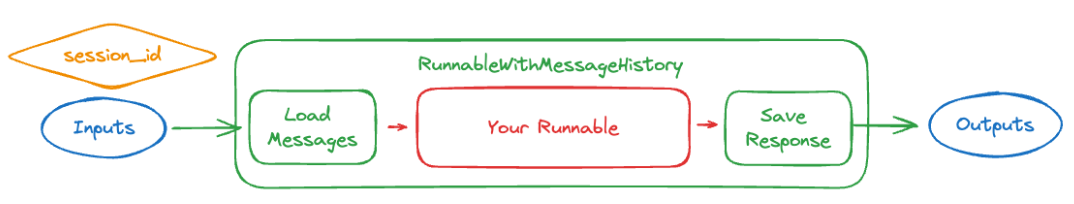

### RunnableWithMessageHistory 개념도

> **세션(session-id) 기반으로 메시지 관리**  
- 각 대화를 구분하기 위해 session-id(세션 ID)를 사용  
- 세션별로 메시지를 저장하고, 필요한 정보를 불러오거나 다시 기록

> **Load Messages**  
- 과거에 주고받았던 메시지(질문, 응답 등)를 불러옴  
- 이 과거 대화 내용이 “대화의 맥락”이 됨

> **Your Runnable(또는 chain)**  
- 실제로 모델이 응답을 생성하거나, 특정 로직을 수행하는 핵심 부분  
- 입력 메시지와 과거 대화 내용을 활용해 결과(응답)를 생성

> **Save Response**  
- 생성된 응답(결과)을 다시 메시지 히스토리에 저장  
- 이후 대화를 진행할 때, 이 응답이 과거 대화로 인식됨

> **Outputs**  
- 최종적으로 사용자가 확인할 수 있는 결과(답변, 메시지 등)  
- 다음 입력이 들어오기 전까지, 이전 메시지들이 히스토리에 누적되어 맥락이 유지됨

In [10]:
from langchain_core.runnables.history import RunnableWithMessageHistory
# 대화 기록과 연동되는 체인을 실행하는 도구
# 현재 입력 + 대화 히스토리를 결합해서 체인에 전달하고, 생성된 응답을 대화 히스토리에 저장하는 기능

from langchain_core.chat_history import BaseChatMessageHistory
# 인터페이스 (또는 추상클래스), 자료형

from langchain_community.chat_message_histories import ChatMessageHistory
# 실질적으로 BaseChatMessageHistory를 구현할 수 있는 클래스
# 실제 대화 메세지를 저장하고 관리하는 기능을 담당하는 클래스

In [ ]:
# 0. 모델 초기화 - llm 변수 활용

In [ ]:
# 1. 메세지 템플릿 객체 생성 - 대화 내용 + 현재 질의를 한꺼번에 전달하는 템플릿 구성
messages = [
    ("system", "당신은 어릴적부터 같이 자라온 나의 가장 친한 친구로써, 반말을 사용함"),

    # 이전 대화 내용을 통째로 넣어주는 자리
    MessagesPlaceholder(variable_name = 'chat_history'),

    ("user", "{input}") # 사용자 입력값
]

prompt = ChatPromptTemplate.from_messages(messages)

In [ ]:
# 2. 체인 구성
chain = prompt | llm | StrOutputParser()

In [ ]:
# 3. 세션 기록 저장을 위한 딕셔너리 초기화
store = {} # key = 세션 ID, value = 대화기록 객체

In [ ]:
# 4. 세션 ID 기반 대화 기록 관리 함수 정의
def get_session_history(session_ids : str) -> BaseChatMessageHistory :

  if session_ids not in store : # session id가 없는 경우
    # 추가 → 없는 key를 지정하고 대입
    # 새로운 세션 id로 대화기록 객체를 초기화시켜서 추가
    store[session_ids] = ChatMessageHistory()

  # session id가 없는 경우 → if 문 내부에서 생성해서 반환
  # session id가 있는 경우 → if 문을 거치지 않고, 지정해서 반환
  return store[session_ids]

In [ ]:
# 5. RunnableWithMessageHistory 객체 생성
runnable_with_history = RunnableWithMessageHistory(
    chain,               # 체인(또는 runnable)
    get_session_history, # 대화기록 관리 함수
    input_messages_key = "input",         # 사용자 입력에 대한 메세지 입력변수 지정
    history_messages_key = "chat_history" # 대화 기록 플레이스홀더 지정
)

In [ ]:
session_id = "session_1"

In [ ]:
# 대화 루프 수행
while True:
  q = input("입력 >> ")

  if q == "exit" :
    print("채팅 종료")
    break

  # 모델 응답 출력 - 대화 기록과 현재 질의를 전달
  response = runnable_with_history.invoke(
      {"input" : q},
      config = {"configurable" : {"session_id" : session_id}}
  )

  print() # 모델 응답 후에 개행용

In [ ]:
# 대화 기록 확인
store["session_1"]

#### ✅ 랭체인 1.x.x ver 이후 경고메세지
```
LangSmith now uses UUID v7 for run and trace identifiers.
This warning appears when passing custom IDs.
Please use: from langsmith import uuid7
Future versions will require UUID v7.
```
- LangSmith에 커스텀 ID를 줄 거면 uuid7 써라는 의미 (무시해도 됨)
- LangSmith를 진짜 쓸 거라면 → 공식 권장 방식으로 설정하기

> 만약 나중에:
> - LangSmith 대시보드에서 체인 실행 로그 보고 싶고, run/trace를 관리하고 싶다
> - 그러면 UUID v7를 이용한 run ID 생성 방식으로 바꿔야 한다는 뜻
> - 일반적으로는 아래처럼 씀:

```python
from langsmith import Client, uuid7
client = Client()
run_id = uuid7()  # LangSmith가 권장하는 UUID v7
# 이후 LangChain 내부에서 이 run_id를 넘길 때도 uuid7 기반으로 넘기라는 의미
```

> 근데 중요한 건:
> - 직접 run_id를 건드리지 않았기 때문에, 해당 경고는 사실상 LangChain / LangSmith 내부 구현에서 조만간 바꿀 예정인 부분에 대한 미리 경고 정도



# RAG(Retrieval-Augmented Generation)
- <font color=red>기존의 LLM을 확장하여 주어진 컨텍스트나 질문에 대해 더욱 정확하고 풍부한 정보를 제공</font>하는 방법
- 즉, 모델이 학습 데이터에 포함되지 않은 외부 데이터를 실시간으로 검색(retrieval)하고 검색된 데이터를 활용(augmented)하여 이를 바탕으로 답변을 생성(generation)하는 것

- 기본 구조
  - <font color=red>검색 단계(Retrieval Phase)</font>: 사용자의 질문이나 컨텍스트를 입력으로 받아서, 이와 관련된 외부 데이터를 검색하는 단계
  - <font color=red>증강 단계(Augmented Phase)</font>: 검색된 데이터를 토큰화, 인코딩, 임베딩 후에 벡터 DB에 저장하고 검색기를 붙이는 단계  
  - <font color=red>생성 단계(Generation Phase)</font>: 벡터 DB에 저장된 데이터와 LLM 모델을 사용하여 사용자의 질문에 답변을 생성하는 단계

- 장점  
  - <font color=red>풍부한 정보 제공</font> : RAG 모델은 검색을 통해 얻은 외부 데이터를 활용하여, 보다 구체적이고 풍부한 정보를 제공
  - <font color=red>실시간 정보 반영</font> : 최신 데이터를 검색하여 반영함으로써, 모델이 실시간으로 변화하는 정보에 대응
  - <font color=red>환각 방지</font> : 검색을 통해 실제 데이터에 기반한 답변을 생성함으로써, 환각 현상이 발생할 위험을 줄이고 정확도 향상

- RAG 8단계 프로세스
  - 사전 준비 단계
    - 문서 가져오기
    - 텍스트 분할
    - 임베딩
    - 벡터 DB에 저장
  - Runtime 단계
    - 검색기 설정
    - 프롬프트 구성
    - LLM 모델 객체 생성
    - 체인 생성 및 실행

### LLM 활용 전략

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain_rag01.png" width=60%>   
</center>

- “검색 기반 지식 필요 여부(y축)”와 “모델 자체 수정 필요 정도(x축)” 2축으로
LLM 활용 전략을 나눠놓은 것
* **왼쪽 위: 외부 지식 필요 多 → RAG 계열이 유리**
* **오른쪽 아래: 모델 자체 개선 필요 多 → Fine-tuning 계열이 유리**
* **중간: 둘 다 섞어 쓸 수 있음(All of the above)**

그리고 RAG도 단순 → 고급 → 모듈형으로 발전해감




### 🌟 RAG 패러다임 발전 요약 (https://futuredrill.stibee.com/p/46/)

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain_rag02.png" width=70%>   
</center>

#### 🟦 1. Naive RAG (기본형 RAG)
> <b>“질문 → 관련 문서 몇 개 가져와서 → LLM에 함께 넣기”</b>
> 가장 단순한 RAG.

##### ✔ 특징

* 문서를 chunk로 나누고 vector DB에 저장
* 질문 유사도 기반으로 <b>그냥 관련 문서 몇 개 찾아서</b>
  그대로 LLM에 제공
* 검색 자체는 *아주 단순한 단계 1개*

> ✔ 장점
> * 구현 쉽고 빠름
> * 어느 정도 환각 감소

> ✔ 한계
> * 검색 품질이 낮으면 결과가 쉽게 흔들림
> * 긴 문서나 구조적 문서 처리 어려움

---

#### 🟧 2. Advanced RAG (고급 RAG)

> <b>“검색 품질을 크게 올리기 위해 ‘검색 전’과 ‘검색 후’를 최적화”</b>

단순 검색에서 벗어나 다음처럼 검색을 강화함

##### 🔹 Pre-Retrieval (검색 전에 하는 작업)

> 검색 전에 질을 높이기 위해:
> * 질문 재작성(Query rewrite)
> * 질문 명확화(Clarification)
> * 문서 전처리(cleaning)
> * 파일 구조 추가
> * 작은→큰 윈도우 재구성
> * Retriever를 여러 개 돌리고 router로 선택
> * 👉 즉, <b>질문과 문서를 더 잘 준비해서</b> 검색 품질을 끌어올림

##### 🔹 Post-Retrieval (검색 후에 하는 작업)

> 검색된 문서에 대해:
> * 재정렬(Rerank)
> * 필터링(Filter)
> * 문서 압축(Prompt compression)
> * 👉 즉, <b>검색 결과 중에 진짜로 중요한 문단만 남기고 LLM에 전달</b>함.

##### ✔ Advanced RAG 요약

* 검색 단계가 <b>Pre → Retrieve → Post</b> 3단계 구조
* Naive RAG보다 정밀하고 정확한 결과 제공

---

#### 🟪 3. Modular RAG (모듈형 RAG)

> <b>“검색과 생성 과정을 하나의 고정 파이프라인이 아닌 모듈 단위로 조립하는 RAG”</b>
> 현대 RAG의 가장 발전된 형태

##### 🔥 핵심 아이디어
검색과 생성에 필요한 여러 기능을 <b>모듈</b>로 만들어
필요할 때 원하는 순서로 조립해 사용

> 예시 모듈:
> * Retrieve (검색)
> * Rerank (정렬)
> * Read (문서 읽기)
> * Rewrite (질문 재작성)
> * Predict (예측)
> * Reflect (반성/평가)
> * Criticize (검증)
> * Filter (불필요 문서 제거)
> * Demonstrate (예시 생성)
> * 👉 원하는 조합으로 <b>“나만의 RAG 파이프라인”</b>을 만들 수 있음

---

##### 🔹 Modular RAG 패턴 예시

| 패턴 이름                                 | 조합 방식                   |
| ------------------------------------- | ----------------------- |
| Retrieve → Read                       | 기본 RAG                  |
| Rewrite → Retrieve                    | 질문 개선 후 검색              |
| Demonstrate → Search → Predict        | 예시 생성 → 더 고급 검색 → 답안 생성 |
| Retrieve → Read → Retrieve → Generate | 고급 다단계 RAG              |
| Decide → Retrieve → Generate          | 상황 판단 후 검색/생성           |

즉, <b>검색과 생성 과정을 무한히 확장할 수 있음</b> <br>
복잡한 업무/도메인에서 최고 성능을 발휘



## RAG의 발전 단계

<table>
<tr><td><b>구분</b><td><b>목적</b></td></td><td><b>명칭</b></td><td><b>설명</b></td></tr>
<tr><td>1세대</td>
<td>기본 RAG</td>
<td>Naive RAG</td>
<td>단순 검색 + LLM (질의→검색→상위k개 문서→LLM입력)</td></tr>
<tr><td rowspan=3>2세대</td>
<td rowspan=3>검색품질 강화</td>
<td>Advanced RAG</td>
<td>사전/사후 검색</td></tr>
<tr><td>TAG (Table-Augmented Generation)</td>
<td>테이블·구조화 데이터까지 포함</td></tr>
<tr>
<td>CAG (Cache-Augmented Generation)</td>
<td>자주 쓰는 질의·응답·검색 결과를 캐싱하여 속도·비용 절감</td></tr>
<tr><td rowspan=3>3세대</td>
<td rowspan=3>구조화·모듈화</td>
<td>Modular RAG</td>
<td>검색, 요약, 필터링, reasoning 모듈을 분리, 파이프라인 최적화 가능</td></tr>
<tr><td>Graph RAG</td>
<td>문서 간 관계를 Knowledge Graph로 변환 후 검색, 맥락 연결성 강화</td></tr>
<tr><td>Knowledge RAG</td>
<td>외부 검색뿐 아니라 온톨로지·도메인 지식 그래프를 통합, 지식베이스 중심 검색</td>
</tr>
<tr><td rowspan=2>4세대</td>
<td rowspan=2>추론·에이전트</td>
<td>Reasoning RAG</td>
<td>단순 검색+생성이 아니라, 검색한 정보를 기반으로 체계적 추론</td></tr>
<tr><td>Agentic RAG</td>
<td>RAG를 하나의 에이전트 구성, 다른 Agent와 협력 가능</td>
</tr>
<tr><td rowspan=3>5세대</td>
<td rowspan=3>상황 적응형·자기 개선</td>
<td>Adaptive RAG</td>
<td>질의 특성에 따라 검색 전략/매개변수 동적 변경</td></tr>
<tr><td>Corrective RAG</td>
<td>초기 생성 답변을 검증·수정, 오류 감지 → 재검색·재생성</td></tr>
<tr><td>Self RAG</td>
<td>LLM이 스스로 답변 품질을 평가하고 재검색, Self-Reflection 포함</td></tr>
</tr>
<tr><td rowspan=3>6세대</td>
<td rowspan=3>멀티모달 적용</td>
<tr><td>MultiModal RAG</td>
<td>텍스트·이미지·오디오·비디오를 함께 검색·생성</td>
</tr>
</table>


- 기본 RAG (Naive RAG)
  - ChatGPT의 광범위한 활용 이후 주목받기 시작한 초기 방법론을 대표
  - 전통적인 프로세스인 인덱싱, 검색, 생성으로 이루어짐

    - 인덱싱 (Indexing) : 외부 지식 데이터를 가져와 검색이 가능하도록 준비하는 단계
      - 원본 데이터를 정리하고 추출하여 다양한 파일 형식을 평문으로 변환
      - 텍스트를 더 작은 크기로 분할
      - 작게 나눈 텍스트들을 컴퓨터가 이해할 수 있도록 벡터로 변환

    - 검색 (Retrieve) : 사용자의 입력을 문서에 검색하여 정보를 검색하는 단계
       - 사용자의 입력을 기반으로, 내용을 벡터로 변환
       - 질문 임베딩과 위의 인덱싱 단계에서 작게 나눈 문서 블록 임베딩 간의 유사성을 계산
       - 유사성 수준에 따라 상위 K개의 문서 블록이 현재 질문에 대한 증강된 컨텍스트 정보로 선택
   - 생성 (Generation) : 증강된 정보를 원래 질문과 통합해 답변을 생성하는 단계
      - 주어진 질문과 관련 문서(2단계에서 선택된 상위 n개의 문서 블록)들은 새로운 프롬프트로 결합
      - 대형 언어 모델은 제공된 정보를 기반으로 질문에 답하는 임무를 수행  

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain_rag03.jpg" width=60%>   
</center>  

## 현업에서 RAG 적용의 한계점
- 최신의 기술을 사용하여 현업에 적용하려면 다양한 문제에 부딪침 → 현업에 맞는 적절한 기술 적용 필요


<center>  
<img src="https://arome1004.cafe24.com/images/langchain/rag_problem02.png" width=60%>   
</center>  

- 데이터 전처리의 중요성
  - RAG는 자료를 기반으로 답변을 생성하기 때문에 자료 전처리가 RAG의 성능을 좌우 (**Garbage in - Garbage out**)
    - 영역구분 → 텍스트 추출 → 표 인식 → OCR → 메타 정보 → Tag 생성 (마이즈앤컴퍼니의 데이터 전처리 6단계)
  - 데이터 전처리가 어려운 이유
    - 입력 자료들에는 복잡한 표, 도식화된 이미지 등이 포함되어 있어 각각에 맞는 전처리가 필요

<center>  
<img src="https://arome1004.cafe24.com/images/langchain/doc_processing01.png" width=30%>   
</center>        

- RAG 개발 스택

<center>  
<img src="https://arome1004.cafe24.com/images/langchain/rag_problem03.png" width=60%><br><font size=1>출처 : https://www.analyticsvidhya.com/blog/2025/04/rag-developer-stack/</font>   
</center>  

- Open Source AI Stack

<center>  
<img src="https://arome1004.cafe24.com/images/langchain/rag_problem04.png" width=40%><br><font size=1>출처 : https://blog.bytebytego.com/p/ep146-the-open-source-ai-stack</font>   
</center>  

## RAG를 강화할 수 있는 영역들
- 쿼리 구조화
  - LLM를 활용하여 RDBMS, Cypher 쿼리 기반 그래프 DB, 벡터 DB를 검색할 수있도록 쿼리를 구조화하는 과정
- Query 변환
  - 쿼리 분해 : 복잡한 쿼리를 간단한 하위 쿼리로 분해하는 과정
    - **RAG-Fusion** : 쿼리생성 → 하위 쿼리 검색 → RRF(상호 순위 융합) 기반 검색문서 병합 및 순위 결합을 통해 가장 관련성 높은 쿼리 생성
  - 유사 문서 생성
    - **HyDE (가상 문서 임베딩)** : 검색 과정을 돕기 위해 질의에 기반하여 생성된 가상문서를 생성    

- 검색
  - Ranking : 관련성이 높은 순으로 검색 문서를 재정렬

- 현업에서는 상황에 맞도록 강화할 대상을 선택하고 단계적으로 진행해야 함
  
<center>  
<img src="https://arome1004.cafe24.com/images/langchain/rag_problem06.png" width=70%>
</center>

# RAG 1 : PDF 기반의 QnA 만들기
  - (1) 데이터 로드(Load Data)
    - RAG에 사용할 데이터를 불러오는 단계
  - (2) 텍스트 분할(Text Split)
    - 불러온 데이터를 작은 크기의 단위(chunk)로 분할하는 단계
  - (3) 임베딩 (Embedding) / 인덱싱 (Indexing)
    - 텍스트 데이터를 숫자로 이루어진 벡터로 변환하는 단계
    - 분할된 텍스트를 검색 가능한 형태로 만드는 단계
  - (4) 검색(Retrieval)
    - 사용자의 질문이나 주어진 컨텍스트에 가장 관련된 정보를 찾아내는 단계
  - (5) 생성(Generation)
    - 검색된 정보를 바탕으로 사용자의 질문에 답변을 생성하는 최종 단계

### (1) 데이터 로드(Load Data)
  - 참고 : https://wikidocs.net/233775, https://wikidocs.net/231429
  - 외부 데이터 소스에서 정보를 수집하고, 필요한 형식으로 변환하여 시스템에 로드
  - 가져온 데이터는 검색에 사용될 지식이나 정보를 담고 있어야 함
  - (예) 공개 데이터셋, 웹 크롤링을 통해 얻은 데이터, 또는 사전에 정리된 자료 등
  - 데이터 로드 라이브러리 종류
    - PDF : pypdf 라이브러리
    - HWP : langchain-teddynote의 HWPLoader
    - CSV : langchain_community의 CSVLoader
    - Excel : openpyxl 라이브러리
    - Word : docx2txt 라이브러리
    - PPT : python-pptx 라이브러리
    - 웹문서 : langchain_community의 WebBaseLoader
    - 텍스트 : langchain_community의 TextLoader
    - JSON : json 라이브러리

- PDF 파일 읽기

```python
SPRi AI Brief 산업동향
- PRi(Software Policy & Research Institute, 소프트웨어정책연구소)
- 인공지능 산업 전반의 최신 정책·법제, 기업·산업 동향, 기술·연구 성과, 인력·교육 이슈를 매월 요약·정리한 브리핑 리포트
- 해외 주요 기관(EU, 미국, 일본 등)의 정책 발표, 글로벌 빅테크 기업의 신제품·서비스, 최신 연구 성과, 노동시장 변화 등을 빠르게 파악할 수 있는 산업 동향 브리프로 구성
```

In [ ]:
from langchain_community.document_loaders import PyPDFDirectoryLoader
# 해당 디렉토리의 pdf 파일을 읽어 올 때 사용하는 리더기

In [ ]:
loader = PyPDFDirectoryLoader("./data/") # 해당 디렉토리 경로 지정
documents = loader.load()

In [ ]:
len(documents)

#### (2) 텍스트 분할(Text Split)

> 토큰 (Token) : 텍스트를 구성하는 가장 작은 단위
- 보통 단어, 부분 단어, 구두점 등으로 분리됨

> 청크 (Chunk)
> - 여러 토큰을 하나의 의미 단위로 묶은 것
> - 문장 내 구(phrase)나 문장 단위로 의미 있는 그룹을 형성

- 청크의 활용:
  - 임베딩 생성: 각 청크에 대해 텍스트 임베딩을 생성하여 벡터화하고, 검색이나 유사도 계산에 활용함
  - 질의응답 시스템: 사용자의 질문과 관련된 청크를 찾아 응답을 생성함
  - 요약 생성: 청크별로 요약을 생성하고, 이를 종합하여 전체 문서의 요약을 만듬

##### 왜 텍스트를 분할해야 할까?
> - `Document Loader`를 사용하여 다양한 형식의 문서를 성공적으로 불러와도, 이 문서들은 아직 우리 챗봇이 '읽기'에는 너무 김
> - LLM은 한 번에 처리할 수 있는 텍스트의 양, 즉 <br>'컨텍스트 창(Context Window)'</br>에 제한이 있음
> - 예를 들어, `gpt-3.5-turbo` 모델은 약 4,096 토큰(대략 한글 2,000자) 정도를 한 번에 처리할 수 있음
> - 만약 우리가 100페이지짜리 PDF 파일 전체를 한 번에 LLM에게 전달한다면, LLM은 이 정보를 처리하지 못하고 오류를 발생시킬 것

```
비유: 한 입에 너무 큰 음식을 넣는 것과 같음
아무리 맛있는 음식이라도 한 번에 너무 많이 입에 넣으면 제대로 씹거나 삼킬 수 없음
잘게 썰어서 한 입 크기로 만들어야 맛있게 먹을 수 있듯이, 긴 문서도 LLM이 처리하기 좋은 '한 입 크기(청크, Chunk)'로 잘라주어야 함

이 역할을 하는 것이 바로 텍스트 분할기(Text Splitter)
```

---
##### 종류
- <font color=red>CharacterTextSplitter</font>
  - 주어진 텍스트를 설정한 단위로 분할하는 클래스
  - 예를 들어, 문단('\n\n'), 문장('\n'), 단어(빈 공백), 형태소 단위로 분할할 수 있음

- <font color=red>RecursiveCharacterTextSplitter</font>
  - 텍스트를 재귀적으로 분할하여 의미적으로 관련 있는 텍스트 조각들이 함께 있도록 설계된 클래스
  - 분할 과정에서 지정된 <font color=red>문자 리스트(['\n\n', '\n', ' ', ''])를 순서대로 사용하여 텍스트를 분할</font>
  - 분할된 청크의 길이가 설정된 chunk_size보다 작아질 때까지 이 과정을 반복

- <font color=red>split_documents()</font>
  - 데이터 로더의 반환값에서 'page_content' 항목을 찾아서 청크로 분리하는 함수

- <font color=red>split_text()</font>
  - 데이터 로더의 반환값에서 'page_content' 항목만을 가져와 청크로 분리하는 함수
  - 반환값 구성
    - page_content : 분할된 토큰이 저장
    - metadata : 원본 문서에 대한 정보가 저장


- `RecursiveCharacterTextSplitter` (권장 방식)
- <b>작동 방식:</b> 이름 그대로 <b>'재귀적으로(Recursively)'</b> 작동하는, 훨씬 더 지능적인 분할기 → 문맥 유지를 최우선 목표로 함
- <b>핵심 원리:</b> 개발자가 <b>문자 리스트(`separators`)</b>를 제공하면(기본값: `["\n\n", "\n", " ", ""]`), 그 순서대로 분할을 시도함
    1.  먼저, 문단 구분자인 `\n\n` (두 번의 줄바꿈)을 기준으로 텍스트를 나눔
    2.  나눠진 조각 중, 여전히 `chunk_size`보다 큰 조각이 있다면, 그 조각에 대해 다음 구분자인 `\n` (줄바꿈)을 기준으로 다시 나눔
    3.  그래도 `chunk_size`보다 큰 조각이 있다면, 다음 구분자인 ` ` (공백)을 기준으로 나눔
    4.  이 과정을 리스트의 마지막 구분자까지 반복함

> <b>비유: '큰 덩어리부터 작은 덩어리 순으로 썰기'</b>
> - 큰 고깃덩어리를 자를 때, 먼저 큰 뼈 사이를 자르고(문단 분리), 그래도 덩어리가 크면 살코기의 결을 따라 자르고(문장 분리), 마지막으로 한 입 크기로 써는(단어 분리) 것과 같음
> - 최대한 의미 있는 덩어리를 유지하려는 노력

In [11]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
# 텍스트 분할 객체 생성
text_splitter = RecursiveCharacterTextSplitter(
     chunk_size = 500,      # 청크 길이 지정
     length_function = len, # 길이값 계산 기준
     chunk_overlap = 100,   # 중복 허용 길이
)

In [ ]:
# 문서를 청크로 분할
texts = text_splitter.split_documents(documents)

- 코드 data chunking 하기

```python
# 지원되는 프로그램 언어 목록
from langchain_text_splitters import Language

# 지원되는 언어 목록 출력
print([e.value for e in Language])
```

```python
# Python 코드에 대한 기본적인 구분자 확인
RecursiveCharacterTextSplitter.get_separators_for_language(Language.PYTHON)
```
```python
# 샘플 Python 코드
PYTHON_CODE = """
def hello_world():
    print("Hello, World!")

# Call the function
hello_world()
"""

# from_language() : Python 언어에 최적화된 text splitter 생성
python_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON,  # 사용할 언어를 Python으로 설정
    chunk_size=50,             # 청크 크기를 50자로 설정
    chunk_overlap=0            # 청크 간 오버랩 없음
)
# Python 코드 문서를 분할하여 생성
python_docs = python_splitter.create_documents([PYTHON_CODE])
python_docs
```
- 마크다운 문서 Chunking
```python
markdown_text = """
# 🦜️🔗 LangChain

⚡ Building applications with LLMs through composability ⚡

## What is LangChain?

# Hopefully this code block isn't split
LangChain is a framework for...

As an open-source project in a rapidly developing field, we are extremely open to contributions.
"""
# LangChain의 RecursiveCharacterTextSplitter를 사용하여 Markdown 텍스트 분할
md_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.MARKDOWN,  # Markdown 언어 지정
    chunk_size=60,               # 청크 크기를 60자로 설정
    chunk_overlap=0              # 청크 간 오버랩 없음
)

# Markdown 문서를 청크로 나누기
md_docs = md_splitter.create_documents([markdown_text])
md_docs
```
```python
# Markdown 형식의 샘플 텍스트
markdown_document = """# Foo\n\n    ## Bar\n\nHi this is Jim\n\nHi this is Joe\n\n ### Boo \n\n Hi this is Lance \n\n
## Baz\n\n Hi this is Molly"""

# 헤더를 기준으로 Markdown을 분할하기 위한 규칙 설정
# 텍스트가 어느 계층에 포함되어 있는지 정보를 LLM 전달할 수 있다는 장점
headers_to_split_on = [
    ("#", "Header 1"),   # `#`은 Header 1로 분류
    ("##", "Header 2"),  # `##`는 Header 2로 분류
    ("###", "Header 3"), # `###`는 Header 3로 분류
]

# 헤더 기반으로 Markdown을 분할하는 Splitter 생성
markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on)

# 설정한 헤더를 기준으로 Markdown을 분할
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits
```
- Sementic Chunking
  - 임베딩 모델을 사용하여 텍스트의 의미(Semantic) 기반으로 청크를 생성해, 문맥적으로 연관된 내용을 하나의 청크로 묶는 방식
```python
# PDF 로더 객체 생성
loader = PyPDFLoader("./data/SPRi AI Brief 5월호 산업동향.pdf")

# PDF의 각 페이지를 저장할 리스트
pages = []

# 비동기 방식으로 PDF의 각 페이지를 로드 (async for 사용)
async for page in loader.alazy_load():
    pages.append(page)

# SemanticChunker를 사용하여 의미 기반으로 텍스트를 분할
# OpenSource 임베딩 모델(OllamaEmbeddings, bge-m3 등)을 사용하면 비용이 들지 않음
text_splitter = SemanticChunker(OpenAIEmbeddings())

# 문서를 의미적 청킹(Semantic Chunking) 수행
docs = text_splitter.split_documents(pages)

# 첫 번째 청크의 내용 출력
docs
```

#### (3) 임베딩 (Embedding)
- 텍스트 데이터를 숫자로 이루어진 벡터로 변환하는 단계
- 분할된 텍스트를 검색 가능한 형태로 만드는 단계
    - 분리된 토큰을 인코딩하고 토큰간의 연관성으로 <font color=red>크기와 방향 성분 값으로 벡터화</font>하는 과정

<center>  

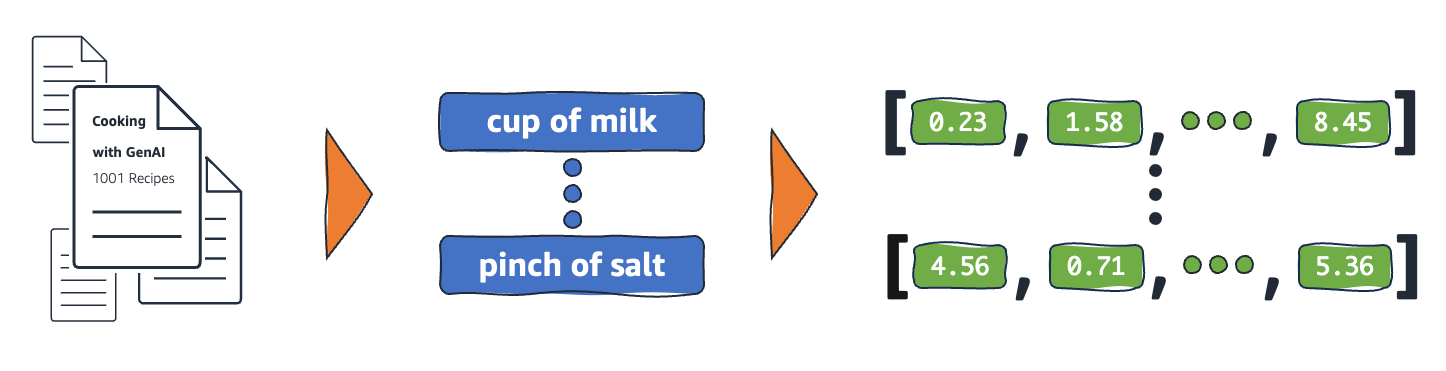

</center>  

- 임베딩 결과 시각화 예시

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/embedding1.png" width=60%>   
</center>

> 임베딩 (Embedding)의 필요성
> - 검색 시간을 단축시키고, 검색의 정확도를 높이는 데 중요한 역할
> - 텍스트 데이터를 벡터 공간 내에서 수학적으로 다룰 수 있음
> - 텍스트 간의 유사성 계산, 텍스트 데이터 기반 다양한 머신러닝 및 자연어 처리 작업 수행
> - 임베딩 과정은 텍스트의 의미적인 정보를 보존하도록 설계
> - 벡터 공간에서 가까이 위치한 텍스트 조각들은 의미적으로도 유사한 것으로 간주

> 임베딩 모델 제공자
> - OpenAI의 OpenAIEmbeddings (https://platform.openai.com/docs/models)
> - Hugging Face의 HuggingFaceEmbeddings
> - Google의 GoogleGenerativeAIEmbeddings
> - OllamaEmbeddiongs (OpenSource) 등  

In [12]:
from langchain_openai.embeddings import OpenAIEmbeddings

In [ ]:
# 임베딩 모델 초기화
embeddings_model = OpenAIEmbeddings(model = "text-embedding-3-large")

- 임베딩 모델 간단 테스트

In [ ]:
# (테스트) 문서 리스트 기반으로 벡터 변환
test = ["안녕하세요", "반갑습니다", "당신은 이름이 무엇인가요", "나의 친구는 나를 봉균이라고 부른다"]

embeddings = embeddings_model.embed_documents(test)

In [ ]:
print("벡터 개수 :", len(embeddings))
print("벡터 길이 :", len(embeddings[2]))

### 벡터 저장소
  - 참고 : https://wikidocs.net/233778, https://wikidocs.net/231433
  - 벡터 형태로 표현된 데이터, 즉 임베딩 벡터들을 효율적으로 저장하고 검색할 수 있는 시스템이나 데이터베이스
  - <font color=red>임베딩 결과를 벡터DB에 저장 </font>
  - FAISS, Chroma, Pinecone, Qdrant 등


<center>  
<img src="https://arome1004.cafe24.com/images/langchain/vector_db.png" width=50%><br><font size=1>출처 : 벡터 DB 종류 (엔코아 블로그)</font>   
</center>  

### 📌 Chroma vs FAISS 비교표

| 구분               | **Chroma**                 | **FAISS**                               |
| ---------------- | -------------------------- | --------------------------------------- |
| **설명**           | 로컬·파일 기반으로 쉽게 쓰는 가벼운 벡터 DB | 메타(Facebook)가 개발한 고성능 벡터 검색 엔진          |
| **설치/사용 난이도**    | ⭐ 매우 쉬움                    | ⭐⭐ 중간(조금 더 기술적)                         |
| **저장 방식**        | SQLite/Local 파일 기반         | 메모리/인덱스 파일 기반                           |
| **검색 속도**        | 중간                         | 매우 빠름(고성능)                              |
| **대규모 데이터**      | 중·소규모 데이터에 적합              | 대량(수십~수백만 벡터)에서도 고속 검색 가능               |
| **데이터 지속성**      | 파일로 저장 → 재사용 가능            | 인메모리 중심, 직접 저장을 구현해야 함(저장/로드 지원은 있음)    |
| **필요한 구성 요소**    | 파이썬만 있으면 동작(가볍고 간단)        | CPU 또는 GPU 환경 필요(특히 GPU 버전 매우 빠름)       |
| **문서화 & 예제**     | 교육용·입문용으로 설명이 쉽고 예제가 많음    | ML/IR(Information Retrieval) 영역에서 많이 쓰임 |
| **LangChain 연동** | `langchain-chroma`로 간단     | `FAISS.from_documents()`로 쉽게 연동 가능      |
| **장점**           | - 설치·사용이 매우 간단             |                                         |


#### **FAISS**
  - Facebook에서 만든 벡터 DB 라이브러리
  - 임시로 간단하게 벡터값을 저장하고 검색하는 기능을 제공
  - 대용량 벡터의 효율적인 검색 지원
  - 문서 검색, 추천 시스템, 이미지 검색 등에서 활용
  - 벡터 유사도를 계산하여 가장 가까운 문서를 빠르게 찾을 수 있음

In [13]:
from langchain_community.vectorstores import FAISS

In [ ]:
# 텍스트를 임베딩 후, 벡터DB에 저장
vec_db = FAISS.from_documents(texts, embeddings_model)

- FAISS 벡터 DB를 로컬에 저장하기

In [ ]:
vec_db.save_local("./db/faiss")

- 벡터 DB 불러오기
```python
vec_db2 = FAISS.load_local(
    './db/faiss',            # 저장된 벡터 DB 폴더
    embeddings_model,        # 같은 임베딩 모델
    allow_dangerous_deserialization = True #   → 저장된 pickle 파일(.pkl)은 역직렬화 과정이 필요하기 때문에 True (필수)
                                           # 왜 "dangerous"냐?
                                           #   - pickle은 임의 코드 실행 위험이 있어 보안상 경고가 붙어 있음
                                           #   - 하지만 우리가 직접 저장한 벡터 DB라면 안전하므로 True 설정해야 함
)
```

- 검색 테스트

In [ ]:
# 1개의 유사한 문서를 겁색 (기본 검색)
results = vec_db.similarity_search_with_score(query = "알파이볼브가 뭐야?", k = 3)

In [ ]:
for doc, score in results :
  print(f"[유사도 점수(거리값) : {score:.3f}] {doc.page_content[:100]}")
  print("-" * 100)

# 거리값이 낮다 → 더 유사하다
# 거리값이 높다 → 덜 유사하다

#### Chroma 벡터 DB

- 텍스트 검색과 추천 시스템 등에 활용
- Chroma는 쿼리 시 더 다양한 필터링과 조합이 가능
```python
#  Chroma 벡터 저장소 생성
vector_store = Chroma(
    collection_name="test_01",            # 데이터가 저장될 컬렉션 이름
    embedding_function=OpenAIEmbeddings()
)

#  UUID를 활용하여 문서별 고유 ID 생성
ids = [str(uuid4()) for _ in range(len(texts2))]

# 벡터 저장소에 문서 추가 (임베딩 자동 생성)
vector_store.add_documents(documents=texts2, ids=ids)
```
```python
# 1개의 유사한 문서를 검색 (기본 검색)
results = vector_store.similarity_search(query = "알파이볼브가 뭐야?", k=3)

# 검색된 문서 출력
for doc in results:
    print(f"* {doc.page_content} [{doc.metadata}]")
```
```python
# 유사도 점수를 포함한 검색 (Query와 문서 간 거리 계산)
results = vector_store.similarity_search_with_score(query="알파이볼브가 뭐야?", k=3)

# 검색된 문서와 점수 출력
for doc, score in results:
    print(f"* [유사도={score:.3f}] {doc.page_content[:100]} [{doc.metadata}]")  # 상위 100자만 출력
    print("-" * 100)
```
#### Qdrant 벡터 DB
- 실제 상용화에도 사용가능한 벡터 검색(Vector Search) 및 필터링을 지원하는 벡터 데이터베이스
- 메모리 내(in-memory) 실행 가능하며, 영구 저장(persistent storage)도 지원
- Web UI 지원 (https://cloud.qdrant.io/)
  - 로그인 후 Clusters를 생성
  - Client 설정정보 복사 (Python용)
- Hybrid 임베딩 지원 (키워드 기반, CoBERT 등)
- FAISS나 Chroma와 다르게, 메타데이터 기반 필터링 기능이 강력함
```python
# Qdrant 클라이언트 생성 (메모리 기반)
# ":memory:" 옵션을 사용하면 휘발성(In-Memory) 데이터베이스로 실행됨
#client = QdrantClient(":memory:")

# 해당 폴더에 저장
client = QdrantClient(path="./db/qdrant3")

# Qdrant 컬렉션 생성
client.create_collection(
    collection_name="test",       # 저장소 이름
    vectors_config=VectorParams(
        size=3072,                # 벡터 차원 수 (사용하는 임베딩 모델에 맞춰야 함)
        distance=Distance.COSINE  # 벡터 간 유사도 측정 방식 (코사인 거리 사용)
    ),
)

# Qdrant 벡터 저장소 객체 생성
vector_store = QdrantVectorStore(
    client=client,                # Qdrant 클라이언트
    collection_name="test",       # 컬렉션 이름
    embedding=OpenAIEmbeddings()  # Ollama 임베딩 모델 사용
)
```
```python
# 각 문서에 대해 고유한 ID 생성
ids = [str(uuid4()) for _ in range(len(texts))]

# 벡터 저장소에 문서 추가
vector_store.add_documents(documents=texts2, ids=ids)
```
```python
# 1개의 유사한 문서를 검색 (기본 검색)
results = vector_store.similarity_search(query="알파이볼브가 뭐야?", k=3)

# 검색된 문서 출력
for doc in results:
    print(f"* {doc.page_content} [{doc.metadata}]")
```
```python
results = vector_store.similarity_search(
    query="KDT가 뭐야?",
    k=1,
    # 필터링
    filter=models.Filter(must=[models.FieldCondition(
        key="metadata.page",               # 특정 필드(예: page) 기반 필터링
        match=models.MatchValue(value=1),  # page=1인 문서만 검색
    )])
)

# 필터링된 문서 출력
for doc in results:
    print(f"* {doc.page_content} [{doc.metadata}]")
```
```python
# 유사도 점수를 포함한 검색 (Query와 문서 간 거리 계산)
results = vector_store.similarity_search_with_score(query="알파이볼브가 뭐야?", k=3)

# 검색된 문서와 점수 출력 (높을수록 유사)
for doc, score in results:m
    print(f"* [유사도={score:.3f}] {doc.page_content} [{doc.metadata}]")
    print("-" * 100)
```

#### (4) 검색(Retrieval)
- 사용자의 질문이나 주어진 컨텍스트에 가장 관련된 정보를 찾아내는 단계
  - 사용자의 입력을 바탕으로 쿼리를 생성하고, 인덱싱된 데이터에서 가장 관련성 높은 정보를 검색
  - 검색기 (https://wikidocs.net/233779, https://wikidocs.net/231434)
    - 벡터저장소 지원 검색기
    - 문맥 압축 검색기
    - 앙상블 검색기
    - 긴 문맥 재정렬
    - 상위 문서 검색기
    - 다중 쿼리 검색기
    - 셀프 쿼리 검색기
    - 시간 가중 벡터 저장소 검색기
    - 한글 형태소 분석기

- 검색기 설정 - 벡터 DB에서 제공하는 검색기 사용

In [ ]:
retriever = vec_db.as_retriever(search_kwargs = {"k" : 3})

#### (5) 생성(Generation)
  - LLM 모델에 검색 결과와 함께 사용자의 입력을 전달하고 모델은 사전 학습된 지식과 검색 결과를 결합하여 주어진 질문에 가장 적절한 답변을 생성

  - LLM 선택
    - 오픈소스 모델 : DeepSeek, Llama, Mistral, Qween(한글 지원 우수), Gemma, GPT-oss 등
    - 상용 모델 : GPT, Claude, Gemini, Grok 등

  - 주요 파라미터
    - **temperature** : 0에 가까울수록 확정적, 1에 가까울수록 창의적 결과 생성
    - **top_p** : 확률 합이 top_p에 도달할 때까지 상위 토큰만 선택
    - **top_k** : 상위 확률 k개 토큰만 선택
    - **penalty_paramter** : 이미 생성된 토큰이 다시 등장할때 해당 토큰의 확률에 패널티 적용
    - **max_tokens** : 생성할 최대 토큰 수 지정 (대부분 LLM에서 사용)
    - **num_predict** : 생성할 목표 토큰 수 지정 (Mistral, LLaMA, Cohere, 일부 로컬 LLM 프레임워크에서 주로 쓰임)    
    - 로짓 생성 → penalty_paramter → temperature → top_k → top_p → 토큰 샘플링 → Stop 확인 순으로 적용됨


- 대화형 프롬프트 템플릿 설정 (아래 내용에서 불러다 쓰는 함수이므로 실행해야 함)

In [14]:
from langchain_core.runnables import RunnablePassthrough
# 입력을 그대로 전달하는 클래스

In [31]:
template = """다음 문맥만을 참고하여 질문에 대답하세요.:
{context}

질문 : {question}

Source를 기반으로 응답 :
"""

In [32]:
# 1. 템플릿 객체 정의
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
# 검색기 테스트

# 질의어
query = "알파이볼브가 뭐야?"

# 검색기로 관련 문서 가져와보기
docs = retriever.invoke(query)

len(docs)

In [ ]:
# 출처
print(docs[0].metadata.get("source", "Unknown"))

# 청크 내용
print(docs[0].page_content)

In [29]:
# 사용자 함수 정의 - 검색기가 검색한 문서 객체를 하나의 문자열로 변환해주는 함수
def format_docs(docs) : # 문서리스트
  return "\n\n".join(
      [
          f"Source : {doc.metadata.get("source", "Unknown")}\n{doc.page_content}"
          for doc in docs
      ]
  )

In [ ]:
# 함수테스트
print(format_docs(docs))

- gpt-4.1을 사용하여 RAG 기반 chain 구현

In [ ]:
# 모델 초기화 - llm 변수 활용

In [ ]:
# 체인 구성
chain = (
    {"context" : retriever | format_docs, "question" : RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [ ]:
# 체인 실행
result = chain.invoke("알파이볼브가 뭐야?")

### [실습] 다른 PDF 문서로 RAG 기반 QnA 구현해보기!

In [15]:
from langchain_community.document_loaders import PyPDFLoader # 단일 pdf 로더

In [ ]:
# 1. 데이터 로드
loader = PyPDFLoader("./data/2023 KHP_guide.pdf")
documents = loader.load()
len(documents)

In [ ]:
# 2. 텍스트 스플릿
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 500, length_function = len, chunk_overlap = 100)
texts = text_splitter.split_documents(documents)

# 3. 임베딩 & 벡터 DB
vec_db = FAISS.from_documents(texts, OpenAIEmbeddings())
# vec_db.save_local("./db/faiss2")

# 4. 검색기
retriever = vec_db.as_retriever(search_kwargs = {"k" : 3})

# 5. 체인 생성
chain = (
    {"context" : retriever | format_docs, "question" : RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [ ]:
query = "KHP 사업계획서 작성할 때 유의사항은 어떻게 돼?"
result = chain.invoke(query)

# RAG 2 : 여러가지 문서 QA (PDF, DOC, EXCEL, PPT, CSV)
- 참고 : 랭체인으로 RAG 4개발하기 : VectorRAG & GrpahRAG (길벗)

- 문서 (PDF, DOC, Excel, PPT, CSV) 읽기 함수

In [16]:
import pandas as pd
from docx import Document
from langchain_community.document_loaders import CSVLoader
from langchain_community.document_loaders import UnstructuredPowerPointLoader
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.document_loaders import TextLoader

In [ ]:
# Word(.docx) 파일에서 텍스트 추출
def load_docx(path):
    # Word 문서 열기
    doc = Document(path)

    # Word 문서는 '문단(paragraph)' 단위로 구조화되어 있음
    # doc.paragraphs : 문서 내 모든 문단 리스트
    # p.text.strip() != '' : 글자가 없는 빈 문단은 제외
    # "\n".join() : 여러 문단을 줄 단위로 이어붙여 하나의 긴 문자열로 반환
    return "\n".join([p.text for p in doc.paragraphs if p.text.strip() != ''])

In [ ]:
# Excel(.xlsx) 파일에서 텍스트 추출
def load_excel(path):
    xls = pd.ExcelFile(path)  # 엑셀 파일 열기
    all_sheets_texts = []     # 모든 시트 내용을 저장할 리스트

    # Excel은 여러 개의 시트(sheet)를 가질 수 있음
    for sheet_name in xls.sheet_names:
        df = xls.parse(sheet_name)     # 해당 시트 내용을 DataFrame 형태로 불러오기
        # df.values : 모든 셀 값들을 배열로 가져옴
        # ravel() : 2차원 → 1차원으로 평탄화
        # map(str, ...) : 모든 값을 문자열로 변환
        sheet_text = "\n".join(map(str, df.values.ravel()))
        all_sheets_texts.append(sheet_text)

    # 모든 시트 내용을 하나로 합쳐서 반환
    return "\n".join(all_sheets_texts)

In [ ]:
# PDF 파일에서 텍스트 추출
def load_pdf(path):
    try:
        doc = PyPDFLoader(path).load()       # PDF 페이지 단위로 로딩
        # 각 페이지(Document 객체)의 page_content를 추출해 이어붙임
        return "\n".join([page.page_content for page in doc])

    except Exception as e:
        # PDF가 손상되었거나 암호 걸린 경우 오류 발생 가능
        print(f"Error processing PDF {path}. Error: {e}")
        return ""

In [ ]:
# CSV 파일에서 텍스트 추출
def load_csv(path, column_name):
    loader = CSVLoader(
        file_path=path,
        csv_args={
            'delimiter': ',',         # CSV 구분자(쉼표)
            'quotechar': '"',         # 문자열을 감싸는 문자
            'fieldnames': column_name # CSV의 열 이름 지정
        }
    )

    docs = loader.load()  # CSV를 LangChain 문서(Document) 리스트로 변환

    # 문서에서 텍스트만 추출하여 하나의 문자열로 반환
    return "\n".join([page.page_content for page in docs])

In [ ]:
# PowerPoint(.ppt, .pptx) 파일에서 텍스트 추출
def load_ppt(path):
    loader = UnstructuredPowerPointLoader(
        path,
        mode="elements",  # 제목/본문/표 등 PPT 요소 단위로 분석
        strategy="fast",  # 빠른 분석(정밀도보다 속도 우선)
    )

    docs = loader.load()  # 슬라이드 텍스트를 Document 객체 리스트로 반환

    return "\n".join([page.page_content for page in docs])

- 해당 폴더 내의 모든 파일 읽기

In [ ]:
# 모든 파일의 텍스트를 담아둘 리스트
all_texts = []

In [ ]:
for subdir, dirs, files in os.walk("./data/rag_files/") :
  # print(subdir) # 현재 탐색중인 디렉토리 경로
  # print(dirs)   # 하위 폴더 목록
  # print(files)  # subdir 안에 포함된 "파일" 목록

  for file in files : # 파일 목록 순환
    filename = os.path.join(subdir, file) # ex) ./data/rag_files/두뇌건강.docx

    # 파일 확장자 추출 & 소문자 변환
    extention = os.path.splitext(filename)[1].lower()

    # 파일 타입에 따라서 적절한 함수 호출
    text_content = ""
    try :
      if extention == ".pdf" :
        text_content = load_pdf(filename)
      elif extention == ".docx" :
        text_content = load_docx(filename)
      elif extention in [".xls", ".xlsx"] :
        text_content = load_excel(filename)
      elif extention == ".csv" :
        text_content = load_csv(
            filename,
            ["PassengerId",	"Survived",	"Pclass",	"Name",	"Sex",
             "Age",	"Fare",	"Cabin",	"Embarked",	"Family"]
        )
      elif extention in [".ppt", ".pptx"] :
        text_content = load_ppt(filename)
    except Exception as e :
      print(f"Error processing file {filename}, Error {e}")

    if text_content : # 정상적으로 text_content에 문자열 값이 담긴 경우
      all_texts.append(text_content)

In [ ]:
len(all_texts)

- 텍스트를 임베딩하여 벡터 DB에 저장하고 불러옴

In [ ]:
# 하나의 문자열로 합침
combined_texts = "\n".join(all_texts)

In [ ]:
# 텍스트 분할
RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 50,
    length_function = len
)

texts = text_splitter.split_text(combined_texts)

In [ ]:
len(texts)

In [ ]:
# 임베딩 모델 + 벡터 DB
vectorstore = FAISS.from_texts(texts, OpenAIEmbeddings())

In [ ]:
# 검색기 생성
retriever = vectorstore.as_retriever(search_type = "similarity", search_kwargs = {"k" : 8})

- 체인 생성

In [ ]:
chain = (
    {"context" : retriever | format_docs, "question" : RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [ ]:
# 엑셀 기반의 질문
response = chain.invoke("마음 챙김의 리뷰는?")

In [ ]:
# 워드 기반의 질문
chain.invoke("집중력 향상을 위해 좋은 활동은?")

In [ ]:
# pdf 기반의 질문
chain.invoke("세대별 스마트팜 모델의 특징은?")

In [ ]:
# csv 기반의 질문
chain.invoke("승객이 탑승한 항구는?")

In [ ]:
# ppt 기반의 질문

In [ ]:
chain.invoke("머신러닝과 전통적인 프로그래밍 차이점은?")

# RAG 3 : 웹 페이지 QA
- 여러 웹사이트의 데이터 검색
- 참고 : 랭체인으로 RAG 4개발하기 : VectorRAG & GrpahRAG (길벗)

In [17]:
# RAG에 활용할 웹페이지 URL 목록 - RAG에 대한 내용
urls = [
    "https://aws.amazon.com/ko/what-is/retrieval-augmented-generation/",
    "https://brunch.co.kr/@acc9b16b9f0f430/73",
    "https://wikidocs.net/231364"
]

In [18]:
# WebBaseLoader 사용해서 로더 객체 생성
loaders = [WebBaseLoader(url) for url in urls]
loaders

In [19]:
# 웹 문서를 리스트에 할당
documents = []

for loader in loaders :
  documents.extend(loader.load())

In [21]:
print(len(documents))
documents

3


[Document(metadata={'source': 'https://aws.amazon.com/ko/what-is/retrieval-augmented-generation/', 'title': 'RAG란? - 검색 증강 생성 AI 설명 - AWS', 'description': '검색 증강 생성(RAG)이란 무엇이며, 기업에서 RAG AI를 사용하는 방법과 이유, AWS에서 RAG를 사용하는 방법에 대한 내용입니다.', 'language': 'ko-KR'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nRAG란? - 검색 증강 생성 AI 설명 - AWS\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n메인 콘텐츠로 건너뛰기\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFilter: 모두\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nEnglish\n\n\n\n\n\n\n\n\n문의하기\n\n\n\n\nAWS Marketplace\n\n\n\n\n지원  \n\n\n\n\n\n\n\n\n내 계정  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n     \n\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\

In [22]:
# 테스트를 청크로 분할
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 50,
    length_function = len
)

texts = text_splitter.split_documents(documents)

In [23]:
len(texts)

34

In [24]:
from langchain_chroma import Chroma

In [25]:
# 임베딩 + 벡터 DB
db = Chroma.from_documents(texts, OpenAIEmbeddings(), persist_directory = "./db/chroma_db")

In [27]:
# 검색기
retriever = db.as_retriever(search_type = "similarity", search_kwargs = {"k" : 5})

In [33]:
# 체인 구성
chain = (
    {
        "context" : retriever | format_docs,
        "question" : RunnablePassthrough()
    }
    | prompt
    | llm
    | StrOutputParser()
)

In [34]:
# 체인 테스트
response = chain.invoke("RAG의 응용사례와 장점은?")

RAG(Retrieval-Augmented Generation)의 응용사례와 장점은 다음과 같습니다.

**RAG의 장점**

1. **정보의 최신성**  
   RAG는 외부 데이터베이스나 지식 기반을 활용하여 실시간으로 업데이트되는 정보를 반영할 수 있습니다. 이를 통해 빠르게 변화하는 분야나 최신 사건에 대해 정확한 정보를 제공할 수 있습니다.

2. **정확성 향상**  
   RAG는 관련 정보를 직접 참조하므로, 기존 LLM의 "할루시네이션(환각)" 문제를 크게 줄일 수 있습니다. 연구에 따르면, RAG를 적용한 모델은 기존 LLM 대비 사실 정확도가 평균 20% 이상 향상되었습니다.

3. **도메인 적응성**  
   RAG는 특정 분야의 전문 지식을 쉽게 통합할 수 있어 다양한 도메인에 적용이 용이합니다. 예를 들어, 의료 분야에서는 최신 임상 연구 결과를, 법률 분야에서는 최근 판례를 즉시 반영할 수 있습니다.

**RAG의 응용사례**

1. **법률 분야**  
   RAG는 법률 자문 보조 시스템으로 활용될 수 있습니다. 변호사나 의뢰인이 법적 문제를 입력하면, 시스템이 관련 법규, 판례, 법률 해설서를 검색하여 최신의 법률 정보를 바탕으로 정확한 자문과 소송 전략 수립을 지원합니다.

2. **고객 서비스**  
   RAG는 지능형 고객 지원 챗봇에 적용되어, 고객 문의에 대해 제품 매뉴얼, FAQ, 이전 응대 기록 등을 검색해 정확하고 상세한 답변을 제공합니다. 복잡한 문의의 경우 관련 정보를 미리 정리해 전문가에게 전달할 수도 있습니다.

3. **교육 분야**  
   RAG는 개인화된 학습 지원 시스템으로 활용될 수 있습니다. 학생의 질문에 대해 교과서, 논문, 교육용 비디오 등 다양한 자료를 검색해 맞춤형 설명과 예시를 제공하고, 추가 학습이 필요한 부분을 파악해 관련 자료를 추천합니다.

4. **연구 및 개발 분야**  
   RAG는 과학 연구 보조 시스템으로, 연구자가 특정 주제에 대해 질의하면 관련 논문, 특허, 실

# RAG 4 : 실시간 뉴스기사 QA
- 뉴스기사의 내용에 대해 질문할 수 있는 뉴스기사 QA 앱 구축

- Tavily API를 사용하여 LangChain의 웹 검색 기능을 활용하기 위해서는 API 인증키가 필요
- https://tavily.com 에 접속하고 인증키를 발급 (월 1000회 무료 사용 가능)

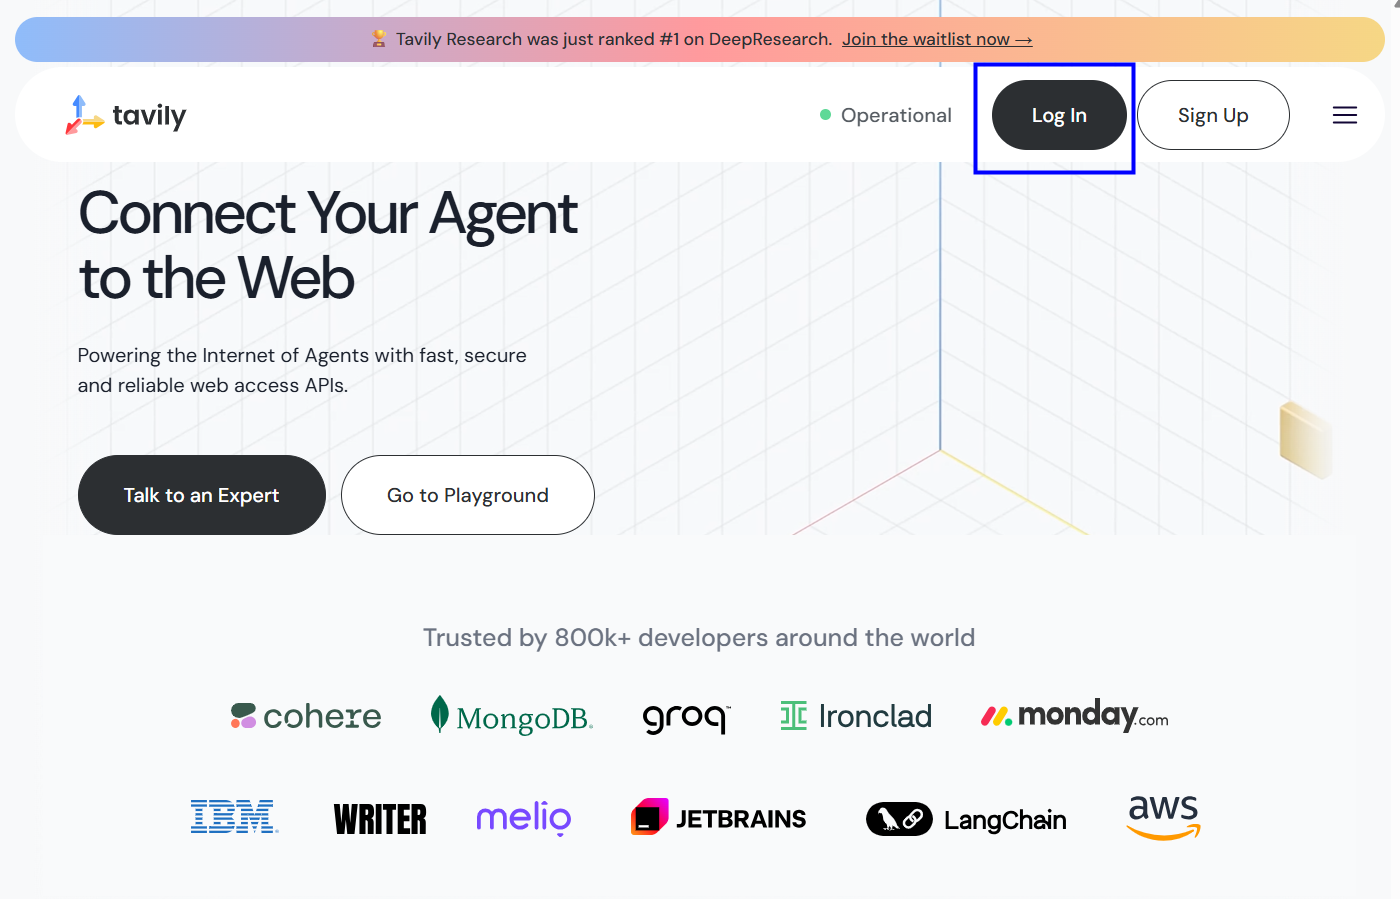

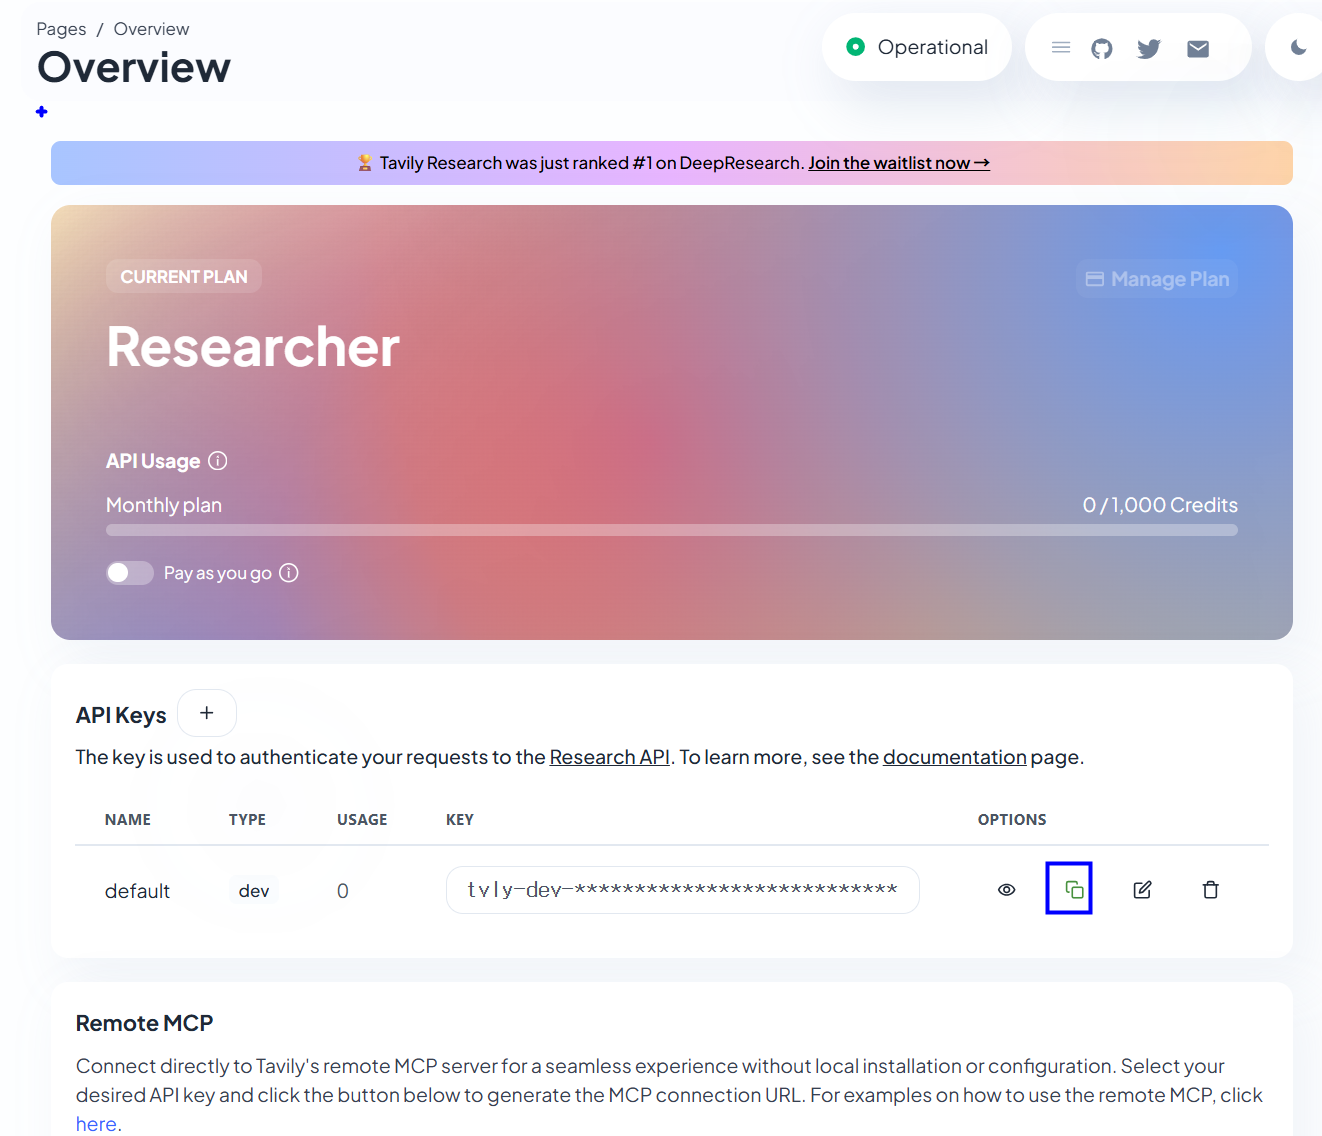

In [35]:
# 환경변수에 등록
os.environ["TAVILY_API_KEY"] = "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"

In [40]:
# 테스트

# from langchain_community.tools import TavilySearchResults
# 랭체인 1.x ver 부터는 TavilySearchResults가 지원되지 않음을 경고

from langchain_tavily import TavilySearch

In [38]:
pip install -U langchain-tavily

In [41]:
# 웹 검색기(MCP 기반) 초기화
web_search = TavilySearch(max_results = 10)

In [44]:
# Tavily 웹 검색기 테스트
query = "2025년 애플의 주가 관현 뉴스를 검색해주세요."
search_results = web_search.invoke(query)
len(search_results["results"])

10

- 한 개의 문서로 통합하고 저장

In [47]:
# 반복문 활용 - results에서의 결과를 하나의 text로 통합

text = ""

for result in search_results["results"] :
  # print("뉴스 제목 : ", result["title"], "\n내용", result["content"])
  # print()
  text += ("뉴스 제목 : " + result["title"] + "\n내용" + result["content"] + "\n")

In [48]:
print(text)

# 1. 문자열 청크 분할(split_texts 함수) → 임베딩, 벡터 DB → 검색기 → 체인

# 2. txt 저장 → TextLoader 활용해서 document로 로드
#    → 청크분할(split_documents 함수) → 임베딩, 벡터 DB → 검색기 → 체인

뉴스 제목 : 애플(Apple) 주가 - Investing.com - 인베스팅닷컴
내용# 애플 (AAPL). Investing.com — 애플 (NASDAQ:AAPL)은 목요일 제니퍼 뉴스테드가 2026년 3월 1일에 법률 고... Investing.com - CLSA는 금요일 애플(NASDAQ:AAPL)에 대한 목표 주가를 265.00달러에서 3... Investing.com — 애플 (NASDAQ:AAPL)은 목요일 제니퍼 뉴스테드가 2026년 3월 1일에 법률 고... Investing.com - CLSA는 금요일 애플(NASDAQ:AAPL)에 대한 목표 주가를 265.00달러에서 3... | 아이폰 모멘텀 | 애플의 iPhone 17 시리즈는 초기 수요는 강했으나 특히 미국 시장에서 모멘텀이 식어가는 등 혼합된 신호를 보이고 있으며, 가격 인상은 3-8%의 매출 상승 효과를 가져올 수 있습니다. ### 오늘 애플 (AAPL)의 주가는? 2025년 12월 05일 기준, 애플(AAPL)은(는) 278.78 가격에 거래되고 있으며 이전 종가는 280.70입니다. ### 애플(AAPL)의 애널리스트 목표주가는 얼마인가요? 리스크 고지: 금융 상품 및/또는 가상화폐 거래는 투자액의 일부 또는 전체를 상실할 수 있는 높은 리스크를 동반하며, 모든 투자자에게 적합하지 않을 수 있습니다. 가상화폐 가격은 변동성이 극단적으로 높고 금융, 규제 또는 정치적 이벤트 등 외부 요인의 영향을 받을 수 있습니다. **Fusion Media**는 본 웹사이트에 표시되는 광고 또는 광고주와 사용자 간의 상호작용에 기반해 광고주로부터 보상을 받을 수 있습니다.
뉴스 제목 : 애플 2025년 3분기 실적발표와 주가, 앞으로 전망 - Naver Blog
내용자사 보통주 1주당 0.26달러의 현금 배당금을 지급한다고 발표했습니다. ; 2025년 8월 14일에 지급됩니다. ; 애플 주가는 장외 거래에서 한때 +3% 급등
뉴스 제목 : 애플의 2025년 기업가치는 다년간의 강력한 랠리 이후에

```python
with open("./data/news.txt", "w") as f:
    f.write(text)

loader = TextLoader("./data/news.txt")
documents = loader.load()

documents


text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50,
                                               length_function = len)
texts = text_splitter.split_documents(documents)

texts

vec_db2 = Chroma.from_documents(documents=texts, embedding=OpenAIEmbeddings())
retriever = vec_db2.as_retriever(search_kwargs={"k": 2})

chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

result = chain.invoke("2025년 애플의 주가 전망은 어떤가요")

print(result)
```

# 멀티모달 모델 사용 (이미지 인식)
- <font color=red>프롬프트 입력</font>으로 텍스트뿐만 아니라 <font color=red>이미지, 오디오 데이터 등을 사용</font>하게 하는 것
- 텍스트: 문서, 책, 웹 페이지 등의 글자로 된 정보
- 이미지: 사진, 그래픽, 그림 등 시각적 정보
- 오디오: 음성, 음악, 소리 효과 등의 청각적 정보
- 비디오: 동영상 클립, 실시간 스트리밍 등 시각적 및 청각적 정보의 결합

- gpt-4o 나 gpt-4-turbo 모델은 이미지 인식 기능(Vision)이 추가되어 있는 모델

- 멀티모달 LLM 함수

In [49]:
import openai # 멀티모달 모델 로드용 라이브러리
import base64 # 이미지를 문자열로 변환하는 라이브러리

In [50]:
def multimodal_rag(query, image_path):
    # 1. 이미지 읽어오기
    with open(image_path, "rb") as image_file:
        image_bytes = image_file.read()

    # 2. GPT-4o 멀티모달 모델 호출
    response = openai.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": query},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": "data:image/png;base64," +
                                   base64.b64encode(image_bytes).decode("utf-8")
                        }
                    }
                ]
            }
        ]
    )

    # 3. 응답 텍스트 반환
    return response.choices[0].message.content

In [ ]:
query = "6월에 가장 적게 판매된 야채는 얼마나 팔렸나요"
print(multimodal_rag(query, "./data/chart1.jpg"))

In [ ]:
query = "한글은 누가 만들었다고 생각하는지에 대한 설문조사 결과는"
print(multimodal_rag(query, "./data/chart2.png"))

- 자동자 번호판 인식

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def multimodal_rag(query, image_path):
  with open(image_path, "rb") as image_file:
      image_bytes = image_file.read()

  response = openai.chat.completions.create(
      model="gpt-4o",
      messages=[
          {"role": "system",
           "content":"문자 인식 전문가이다" },
          {"role": "user",
           "content": [{"type": "text", "text": query},
                       {"type": "image_url",
                        "image_url": {"url": "data:image/png;base64," +
                                      base64.b64encode(image_bytes).decode('utf-8')}}
          ]}
      ]
  )

  return response.choices[0].message.content


img = mpimg.imread("./data/car_number.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

query = "이미지에서 번호판을 인식해서 번호판만 출력해주세요"
print(multimodal_rag(query, "./data/car_number.jpg"))

- 도로 표지판 인식

In [ ]:
def multimodal_rag(query, image_path):
  with open(image_path, "rb") as image_file:
      image_bytes = image_file.read()

  response = openai.chat.completions.create(
      model="gpt-4o",
      messages=[
          {"role": "system",
           "content":"너는 도로 표지판 이미지 인식 전문가이다" },
          {"role": "user",
           "content": [{"type": "text", "text": query},
                       {"type": "image_url",
                        "image_url": {"url": "data:image/png;base64," +
                                      base64.b64encode(image_bytes).decode('utf-8')}}
          ]}
      ]
  )

  return response.choices[0].message.content


img = mpimg.imread("./data/load_sign.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

query = """이미지의 도로 표지 의미만 출력
출력형식
의미 : 표지의미"""

print(multimodal_rag(query, "./data/load_sign.jpg"))

# 비디오(Video) 질의 응답 LLM (Gemini)
 - Goolgle API key 발급
   - https://aistudio.google.com/app/apikey?hl=ko
   - Gemini API와 달리, API key는 File API에 업로드한 데이터에 대한 접근 권한도 부여하므로 API key를 안전하게 보관하는 데 특별히 주의
 - File API를 사용하여 비디오 파일을 업로드
 - GenerateContent 요청을 통해 비디오에 대한 질문을 요청
 - 생성된 응답을 확인
 - 업로드한 Video 파일을 삭제
```python
with open("../key/.google_api_key", "r") as f:
    api_key = f.read().strip()

os.environ['GOOGLE_API_KEY'] = api_key
```
```python
# 비디오 파일 이름 지정
video_file_name = "./data/golf.mp4"

print(f"파일을 업로드 중입니다...")

# 파일 업로드 및 파일 객체 반환
video_file = genai.upload_file(path=video_file_name)

# 업로드 완료 메시지 및 파일 URI 출력
print(f"업로드 완료: {video_file.uri}")
```
- 파일을 업로드한 후, get_files()을 호출하여 API가 파일을 성공적으로 완료되었는지 확인 (실행하지 않아도 다음 내용은 수행됨)
```python
# 비디오 파일 처리 상태 확인
while video_file.state.name == "PROCESSING":
    # 처리 완료 대기 메시지 출력
    print("비디오 업로드 및 전처리가 완료될 때까지 잠시만 기다려주세요...")
    # 5초 대기
    time.sleep(5)
    # 비디오 파일 상태 갱신
    video_file = genai.get_file(video_file.name)

# 처리 실패 시 예외 발생 (raise)
if video_file.state.name == "FAILED":
    raise ValueError(video_file.state.name)

# 처리 완료 메시지 출력
print(
    f"\n비디오 처리가 완료되었습니다!\n이제 대화를 시작할 수 있어요: "
)
```
- 비디오가 업로드된 후, generate_content 함수를 사용하여 Video 에 대한 질문을 요청
```python
# 프롬프트
prompt = "이 영상에 대해서 짧게 요약해 줄 수 있나요?"

# 모델을 Gemini 2.5 Flash로 설정
llm = genai.GenerativeModel(model_name="models/gemini-2.5-flash")

# LLM 답변 요청
result = llm.generate_content([prompt, video_file])

# 결과 출력
print(result.text)
```
- 파일은 2일 후 자동으로 삭제되거나 delete_file()를 사용하여 수동으로 삭제
```python
# 파일 삭제
genai.delete_file(video_file.name)

# 삭제 완료 메시지 출력
print(f"영상을 삭제했습니다: {video_file.uri}")
```